In [52]:
# Downloading the dataset using kagglehub
# This script uses the kagglehub library to download the Telco Customer Churn dataset
#import kagglehub

# Download latest version
#path = kagglehub.dataset_download("blastchar/telco-customer-churn")

#print("Path to dataset files:", path)

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# Remove warnings
import warnings
warnings.filterwarnings("ignore")

In [55]:
# Load the dataset as a pandas DataFrame
df = pd.read_csv(r'D:\Customer Churn\data\WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [56]:
# Check the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)
# Check for null values
print("Null values in the DataFrame:\n", df.isnull().sum())

Shape of the DataFrame: (7043, 21)
Null values in the DataFrame:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [57]:
# Look at the data types of the columns
print("Data types of the columns:\n", df.dtypes)

Data types of the columns:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [58]:
# TotalCharges is a numerical column, but it is stored as an object type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [59]:
# Make two lists of categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
# Print the lists
print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

Categorical columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
Numerical columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [60]:
# Check if SeniorCitizen is a true numeric column
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [61]:
# Remove SeniorCitizen column from numerical columns and add it to categorical columns
numerical_cols.remove('SeniorCitizen')
categorical_cols.append('SeniorCitizen')
# Print the updated lists
print("Updated Categorical columns:", categorical_cols)
print("Updated Numerical columns:", numerical_cols)

Updated Categorical columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'SeniorCitizen']
Updated Numerical columns: ['tenure', 'MonthlyCharges', 'TotalCharges']


In [62]:
# Check for missing values in TotalCharges column
missing_total_charges = df['TotalCharges'].isnull().sum()
print("Missing values in TotalCharges column:", missing_total_charges)

Missing values in TotalCharges column: 11


In [63]:
# To fill in missing values in TotalCharges, check with MonthlyCharges and tenure
df[df['TotalCharges'].isna()][['tenure', 'MonthlyCharges']]


,tenure,MonthlyCharges
488,0,52.55
753,0,20.25
936,0,80.85
1082,0,25.75
1340,0,56.05
3331,0,19.85
3826,0,25.35
4380,0,20.00
5218,0,19.70
6670,0,73.35


In [64]:
# Since tenure is 0 for all missing TotalCharges, we can fill these with 0
df['TotalCharges'].fillna(0, inplace=True)
# Verify that there are no more missing values in TotalCharges
print("Missing values in TotalCharges after filling:", df['TotalCharges'].isnull().sum())

Missing values in TotalCharges after filling: 0


Observe Numerical Columns First

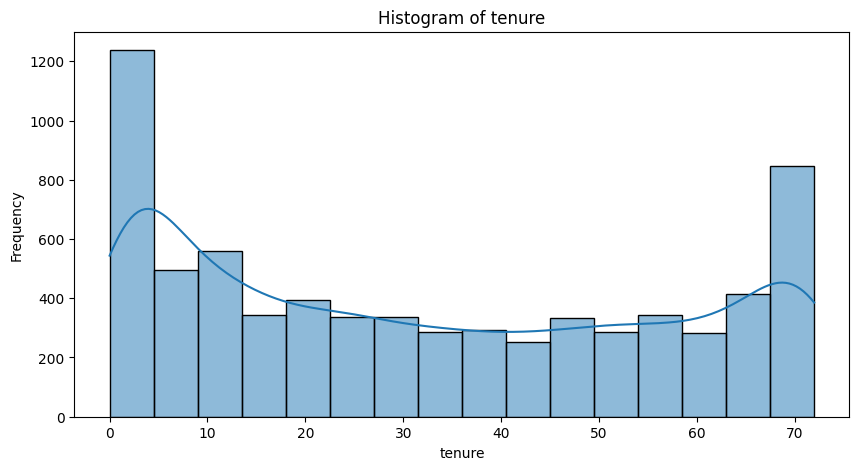

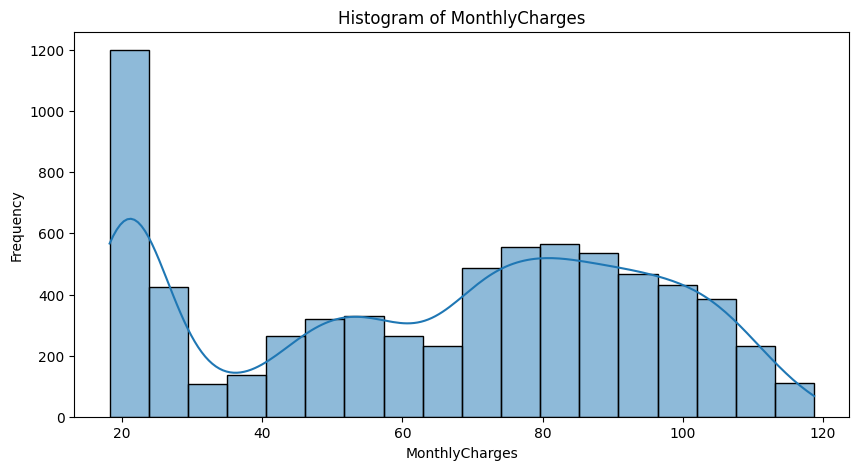

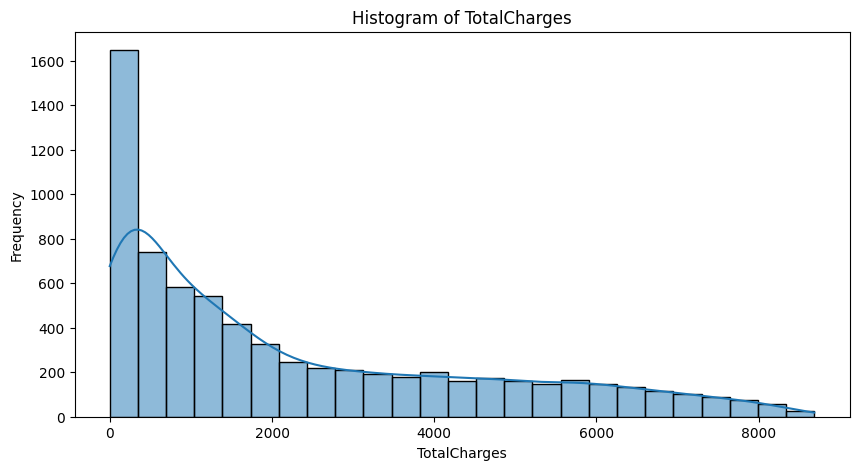

In [65]:
# Obtain Histplots of numerical columns
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [66]:
# Obtain value counts of MonthlyCharges
monthly_charges_counts = df['MonthlyCharges'].value_counts().sort_index()
# Max and min values of MonthlyCharges
print("Max MonthlyCharges:", df['MonthlyCharges'].max())
print("Min MonthlyCharges:", df['MonthlyCharges'].min())

Max MonthlyCharges: 118.75
Min MonthlyCharges: 18.25


### Observations: tenure

- Bimodal: spike near 0 and another around 70
- Indicates new customers and long-term loyal ones
- Hypothesis: new customers more likely to churn → to be verified in bivariate section
- Logged full insight in `eda_log.md`

### Observations: MonthlyCharges

- Bimodal: peaks around $20 and $80
- Suggests two distinct user groups — minimal vs premium service usage
- Hypothesis: churn might be higher in low-paying group → to be tested in bivariate
- Detailed notes logged in `eda_log.md`

### Observations: TotalCharges

- Originally stored as object → converted to float
- 11 rows had NaNs (from `tenure == 0`)
- These users had valid `MonthlyCharges`, but likely left before billing
- Imputed TotalCharges = 0 and added `is_new_user` flag
- Logged full logic in `eda_log.md`



Before moving on to categorical columns, need to decide encoding

In [67]:
# dataframe with only categorical columns
df_categorical = df[categorical_cols]
df_categorical.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,0
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,0
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,0
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,0
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,0


In [68]:
# Checking if customerID is useful for analysis
# Split it into two parts: prefix and suffix
df['customerID_prefix'] = df['customerID'].str.split('-').str[0]
df['customerID_suffix'] = df['customerID'].str.split('-').str[1]
# Check the unique values in the prefix and suffix
print("Unique values in customerID prefix:", len(df['customerID_prefix'].unique()))
print("Unique values in customerID suffix:", len(df['customerID_suffix'].unique()))


Unique values in customerID prefix: 5084
Unique values in customerID suffix: 7040


In [69]:
# Drop the customerID, suffix, and prefix columns
df.drop(columns=['customerID', 'customerID_prefix', 'customerID_suffix'], inplace=True)

In [70]:
# Remove CustomerID from categorical columns
categorical_cols.remove('customerID')
df_categorical = df[categorical_cols]
df_categorical.head()


,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,0
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,0
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,0
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,0
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,0


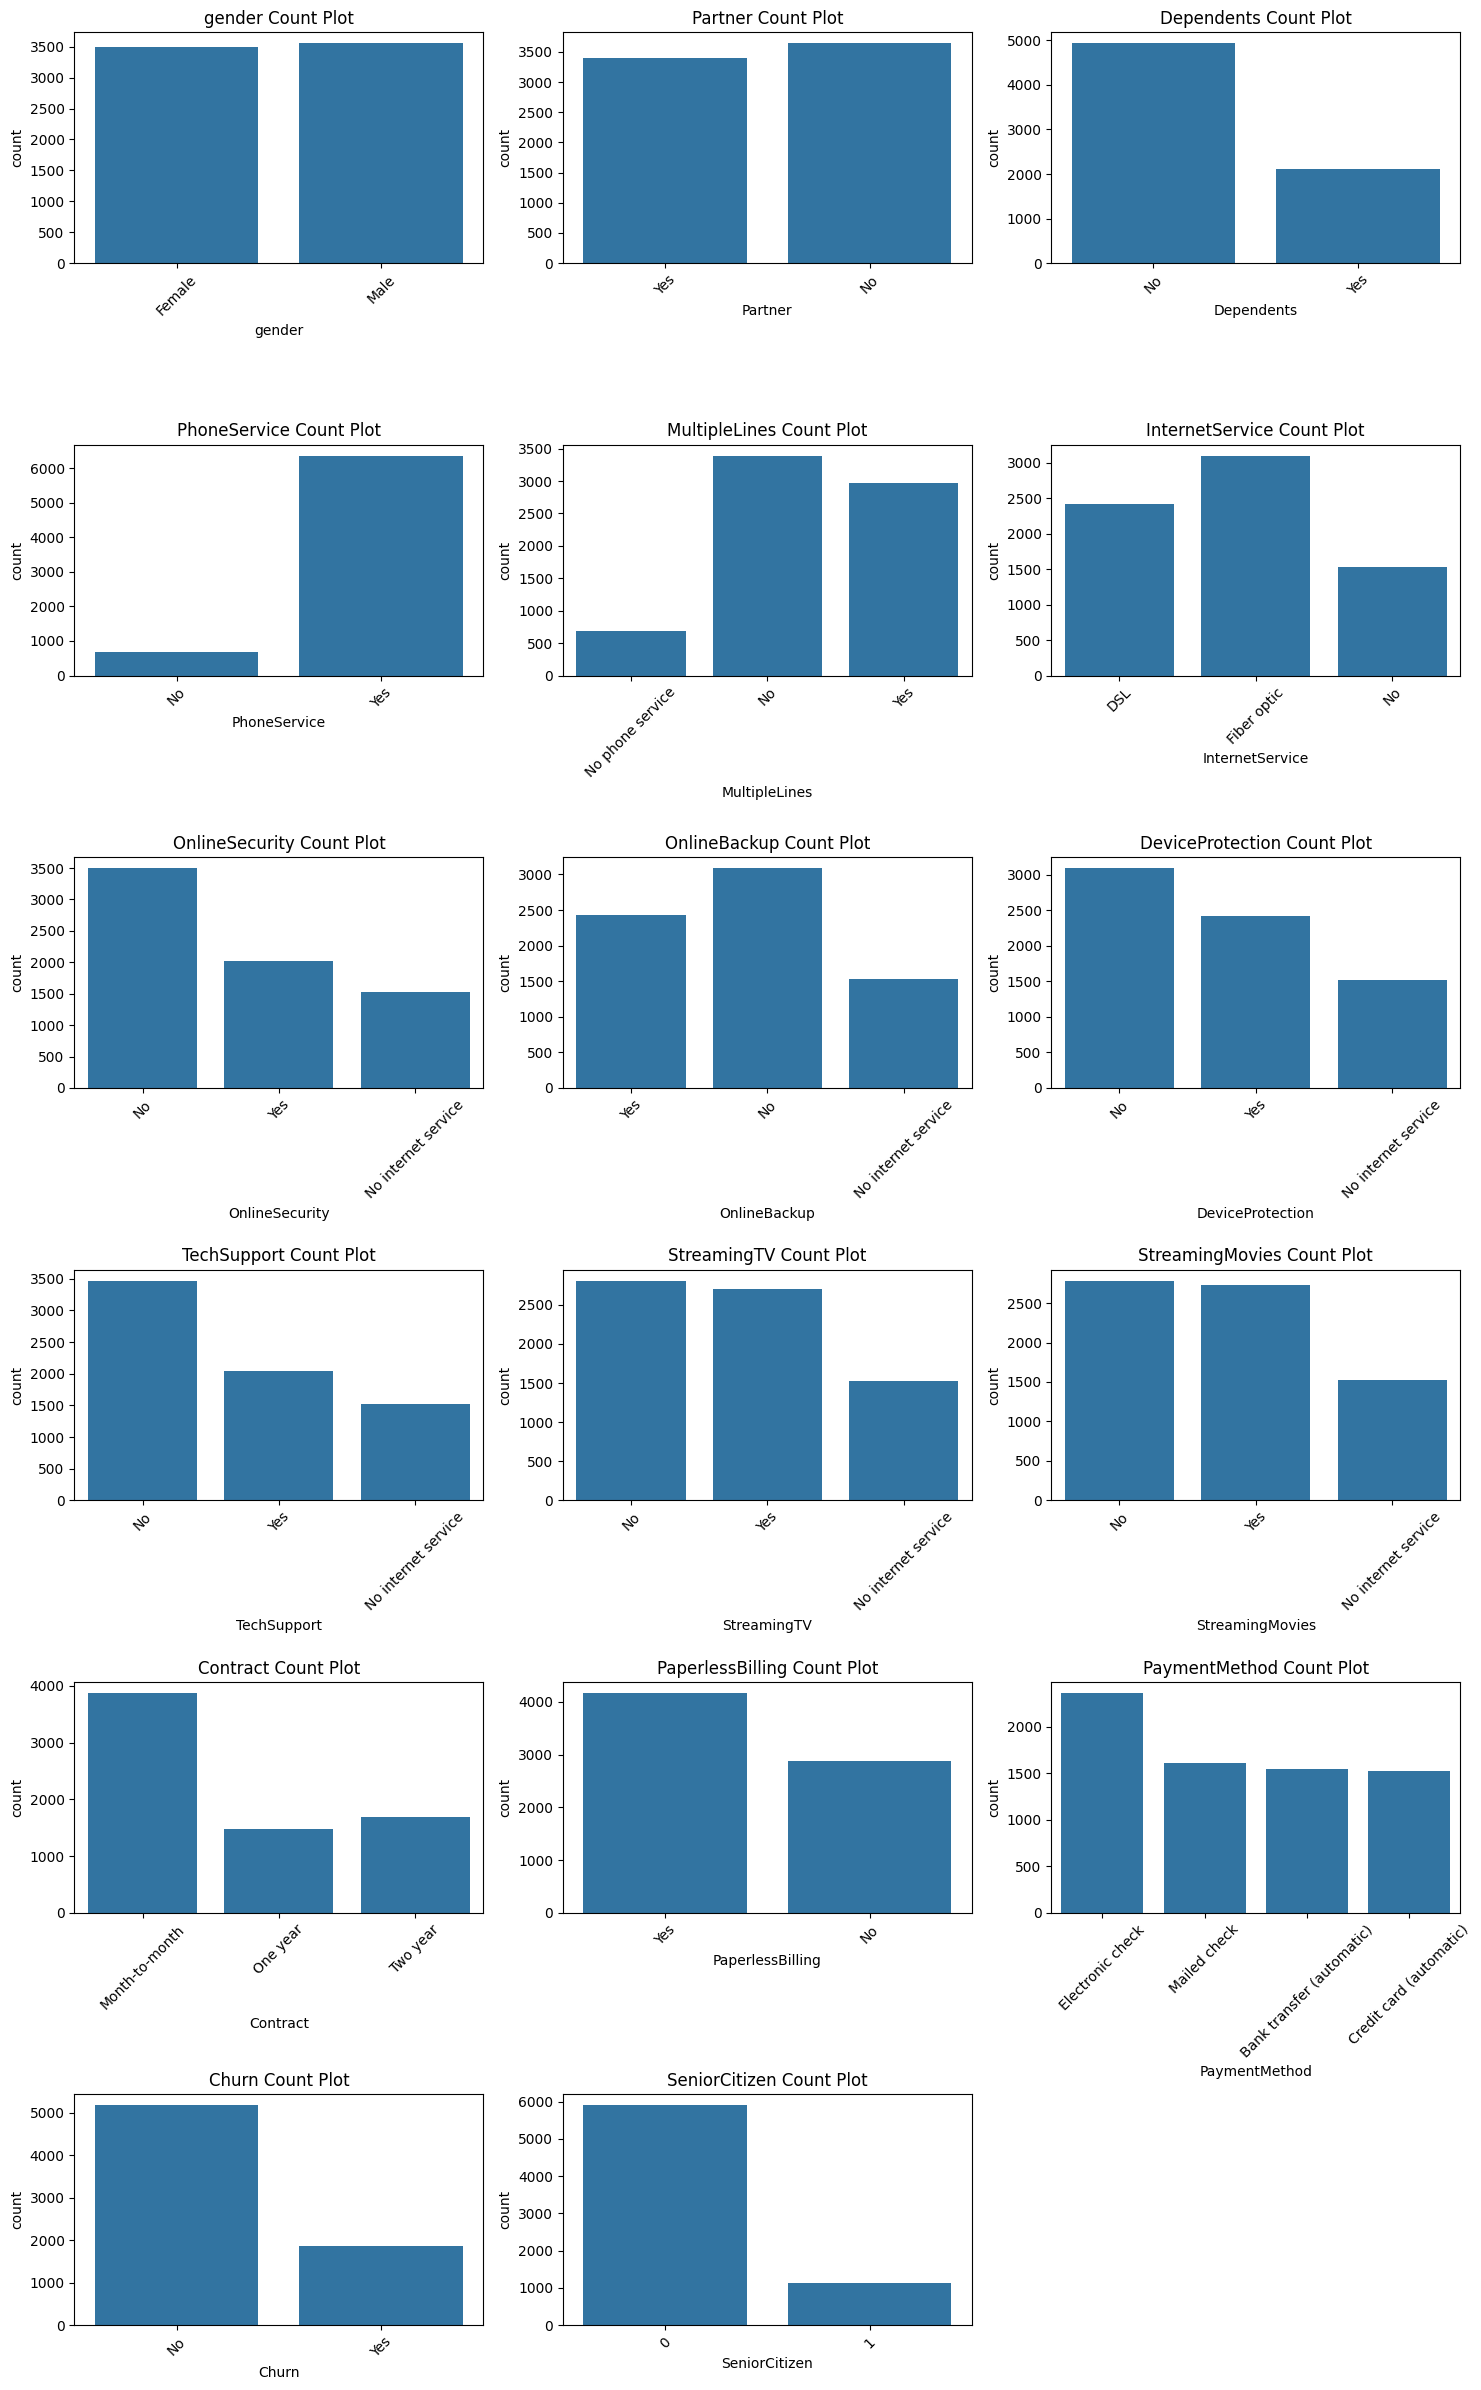

None

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

def plot_categorical_countplots(df, categorical_cols, hue='Churn', cols_per_row=3, figsize_per_plot=(5, 4)):
    n = len(categorical_cols)
    rows = math.ceil(n / cols_per_row)
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(figsize_per_plot[0]*cols_per_row, figsize_per_plot[1]*rows))
    axes = axes.flatten()

    for i, col in enumerate(categorical_cols):
        sns.countplot(data=df, x=col, ax=axes[i])
        axes[i].set_title(f'{col} Count Plot')
        axes[i].tick_params(axis='x', rotation=45)

    # Remove unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show(block=True)

fig = plot_categorical_countplots(df, categorical_cols)
display(fig)


In [72]:
# Convert 'No internet service' to 'No' for internet-related columns
internet_related_cols = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in internet_related_cols:
    df[col] = df[col].replace('No internet service', 'No')

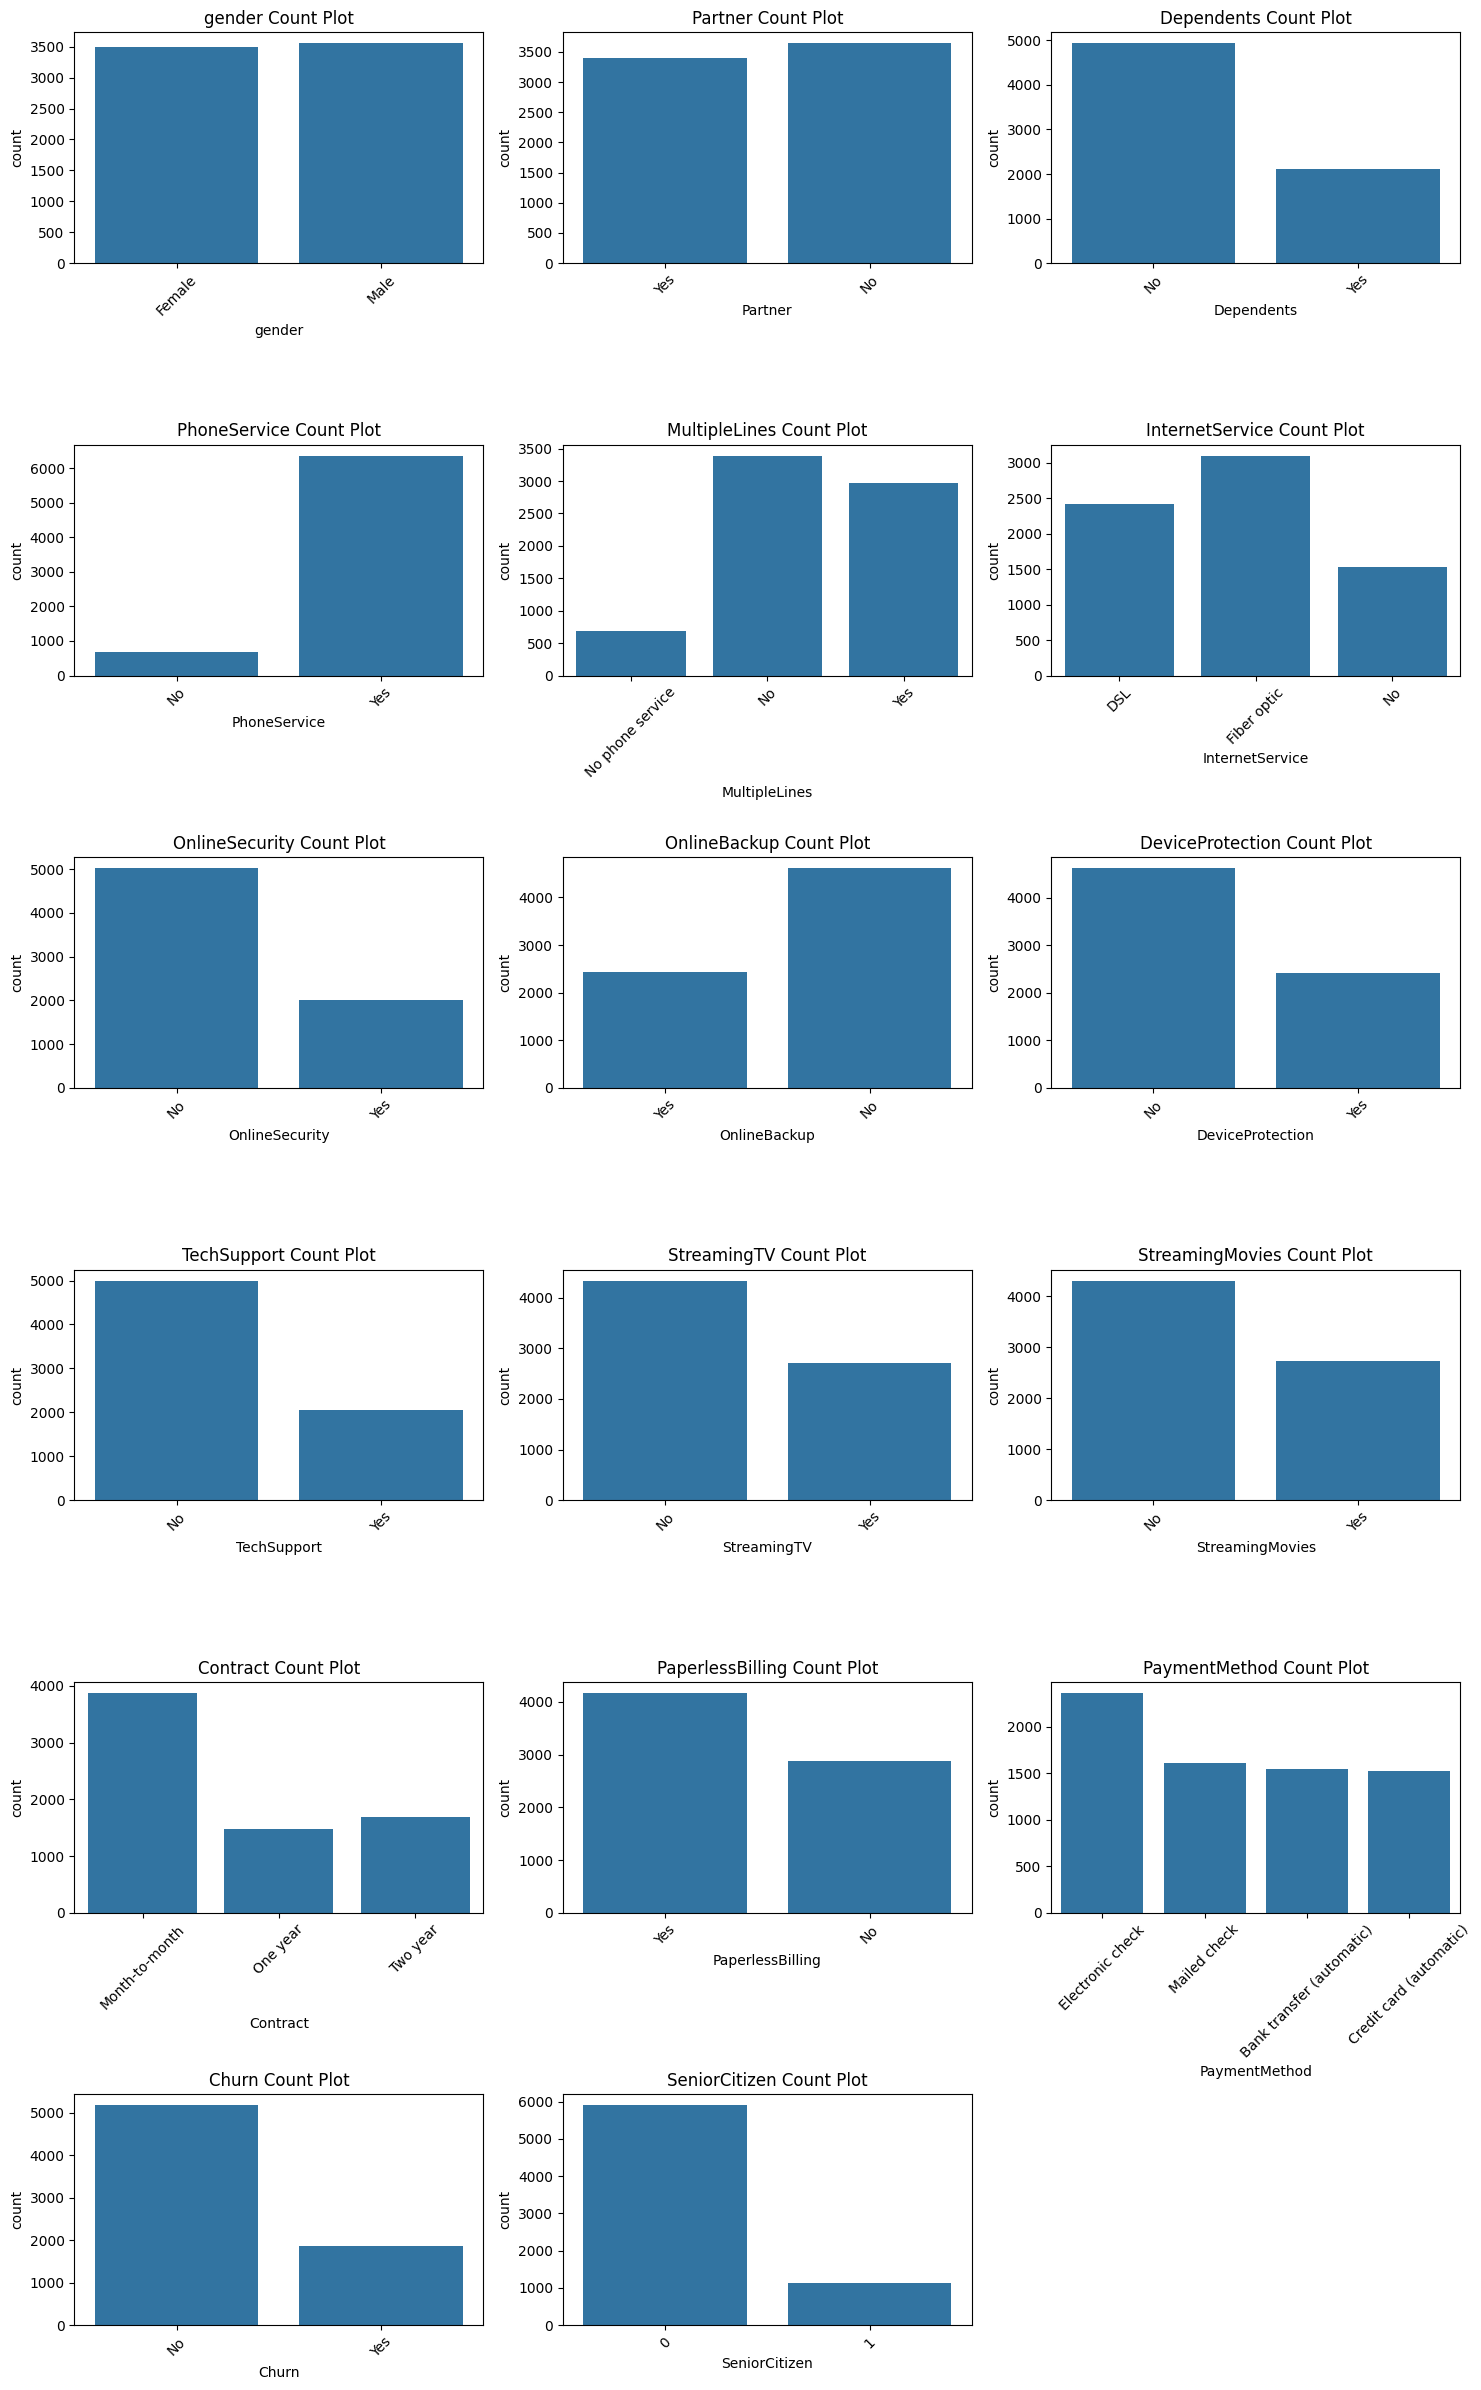

None

In [73]:
fig = plot_categorical_countplots(df, categorical_cols)
display(fig)

In [74]:
# Obtain the percentage of unique values in each categorical column
def get_categorical_percentage(df, categorical_cols):
    percentages = {}
    for col in categorical_cols:
        value_counts = df[col].value_counts(normalize=True) * 100
        percentages[col] = value_counts
    return percentages
percentages = get_categorical_percentage(df, categorical_cols)
percentages

{'gender': gender
 Male      50.47565
 Female    49.52435
 Name: proportion, dtype: float64,
 'Partner': Partner
 No     51.69672
 Yes    48.30328
 Name: proportion, dtype: float64,
 'Dependents': Dependents
 No     70.041176
 Yes    29.958824
 Name: proportion, dtype: float64,
 'PhoneService': PhoneService
 Yes    90.316626
 No      9.683374
 Name: proportion, dtype: float64,
 'MultipleLines': MultipleLines
 No                  48.132898
 Yes                 42.183729
 No phone service     9.683374
 Name: proportion, dtype: float64,
 'InternetService': InternetService
 Fiber optic    43.958540
 DSL            34.374556
 No             21.666903
 Name: proportion, dtype: float64,
 'OnlineSecurity': OnlineSecurity
 No     71.333239
 Yes    28.666761
 Name: proportion, dtype: float64,
 'OnlineBackup': OnlineBackup
 No     65.511856
 Yes    34.488144
 Name: proportion, dtype: float64,
 'DeviceProtection': DeviceProtection
 No     65.611245
 Yes    34.388755
 Name: proportion, dtype: float

Bivariate Analysis

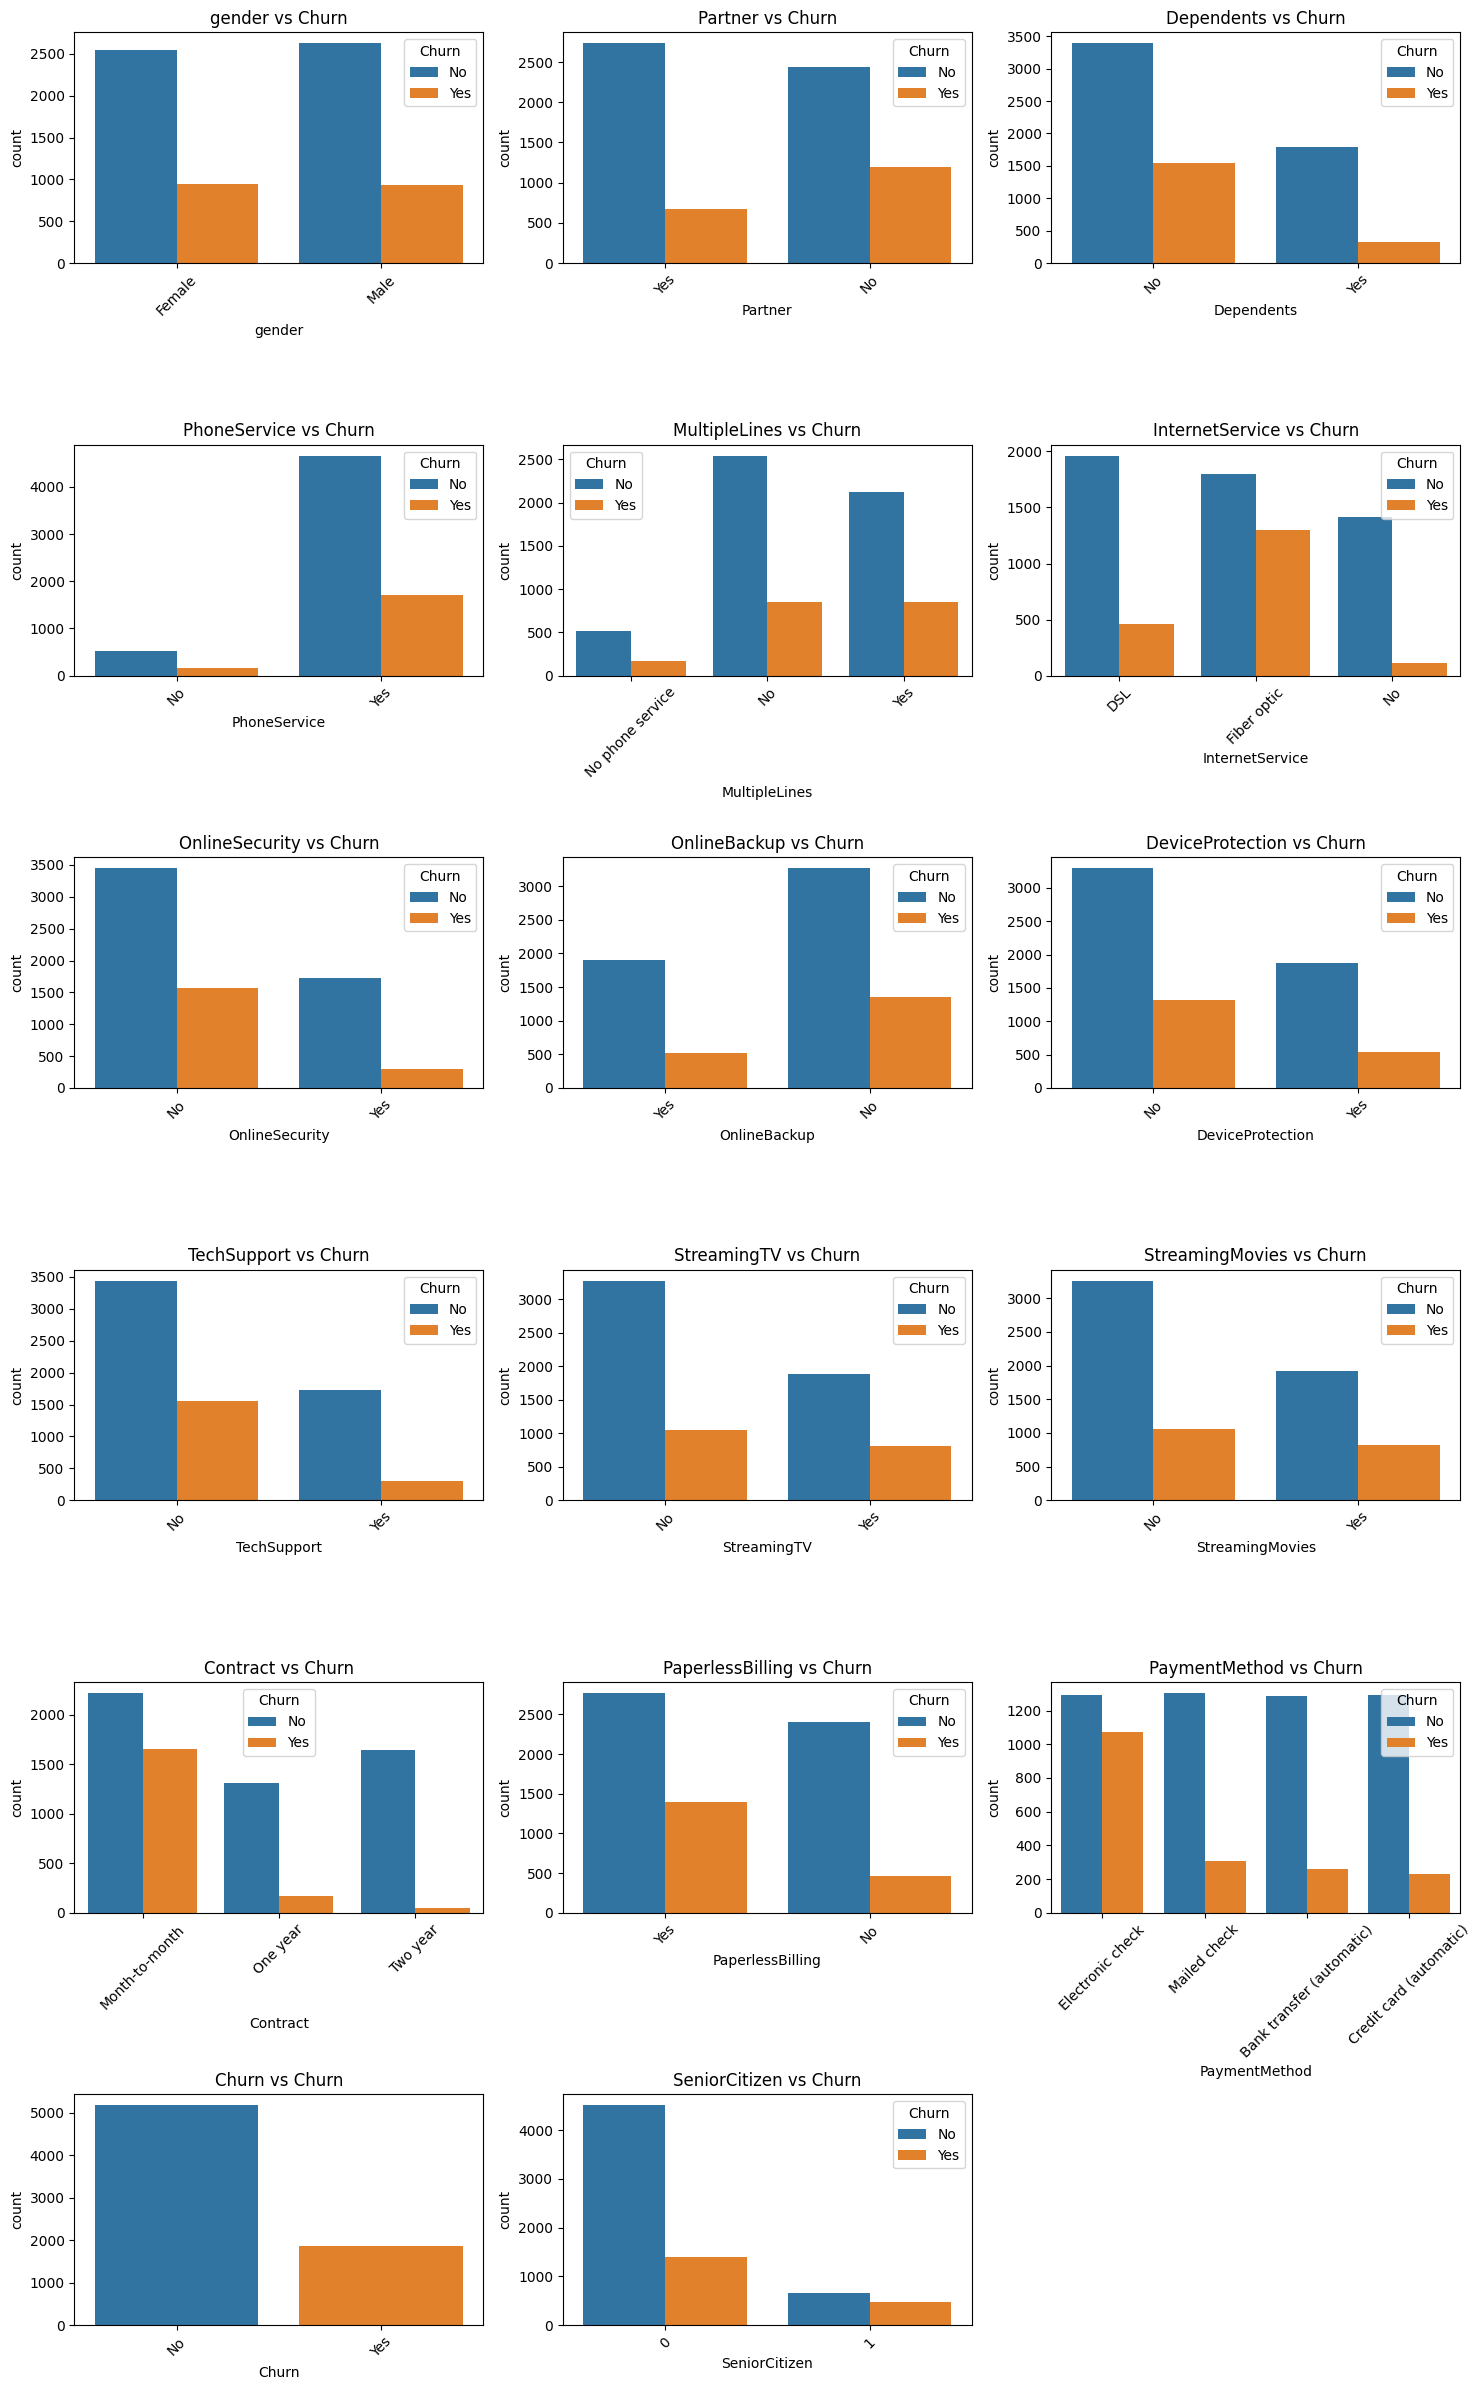

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

def plot_categorical_countplots(df, categorical_cols, hue='Churn', cols_per_row=3, figsize_per_plot=(5, 4)):
    n = len(categorical_cols)
    rows = math.ceil(n / cols_per_row)
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(figsize_per_plot[0]*cols_per_row, figsize_per_plot[1]*rows))
    axes = axes.flatten()

    for i, col in enumerate(categorical_cols):
        sns.countplot(data=df, x=col, hue=hue, ax=axes[i])
        axes[i].set_title(f'{col} vs {hue}')
        axes[i].tick_params(axis='x', rotation=45)

    # Remove unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show(block=True)  # <- guarantees rendering
plot_categorical_countplots(df, categorical_cols, hue='Churn')


In [76]:
def churn_percentage_by_category(df, categorical_cols, target_col='Churn'):
    for col in categorical_cols:
        print(f"\n{col} vs {target_col} (% within each category):")
        cross = pd.crosstab(df[col], df[target_col], normalize='index') * 100
        display(cross.round(2))
churn_percentage_by_category(df, categorical_cols, target_col='Churn')


gender vs Churn (% within each category):


Churn,No,Yes
gender,,
Female,73.08,26.92
Male,73.84,26.16



Partner vs Churn (% within each category):


Churn,No,Yes
Partner,,
No,67.04,32.96
Yes,80.34,19.66



Dependents vs Churn (% within each category):


Churn,No,Yes
Dependents,,
No,68.72,31.28
Yes,84.55,15.45



PhoneService vs Churn (% within each category):


Churn,No,Yes
PhoneService,,
No,75.07,24.93
Yes,73.29,26.71



MultipleLines vs Churn (% within each category):


Churn,No,Yes
MultipleLines,,
No,74.96,25.04
No phone service,75.07,24.93
Yes,71.39,28.61



InternetService vs Churn (% within each category):


Churn,No,Yes
InternetService,,
DSL,81.04,18.96
Fiber optic,58.11,41.89
No,92.60,7.40



OnlineSecurity vs Churn (% within each category):


Churn,No,Yes
OnlineSecurity,,
No,68.67,31.33
Yes,85.39,14.61



OnlineBackup vs Churn (% within each category):


Churn,No,Yes
OnlineBackup,,
No,70.83,29.17
Yes,78.47,21.53



DeviceProtection vs Churn (% within each category):


Churn,No,Yes
DeviceProtection,,
No,71.35,28.65
Yes,77.50,22.50



TechSupport vs Churn (% within each category):


Churn,No,Yes
TechSupport,,
No,68.81,31.19
Yes,84.83,15.17



StreamingTV vs Churn (% within each category):


Churn,No,Yes
StreamingTV,,
No,75.67,24.33
Yes,69.93,30.07



StreamingMovies vs Churn (% within each category):


Churn,No,Yes
StreamingMovies,,
No,75.62,24.38
Yes,70.06,29.94



Contract vs Churn (% within each category):


Churn,No,Yes
Contract,,
Month-to-month,57.29,42.71
One year,88.73,11.27
Two year,97.17,2.83



PaperlessBilling vs Churn (% within each category):


Churn,No,Yes
PaperlessBilling,,
No,83.67,16.33
Yes,66.43,33.57



PaymentMethod vs Churn (% within each category):


Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),83.29,16.71
Credit card (automatic),84.76,15.24
Electronic check,54.71,45.29
Mailed check,80.89,19.11



Churn vs Churn (% within each category):


Churn,No,Yes
Churn,,
No,100.0,0.0
Yes,0.0,100.0



SeniorCitizen vs Churn (% within each category):


Churn,No,Yes
SeniorCitizen,,
0,76.39,23.61
1,58.32,41.68


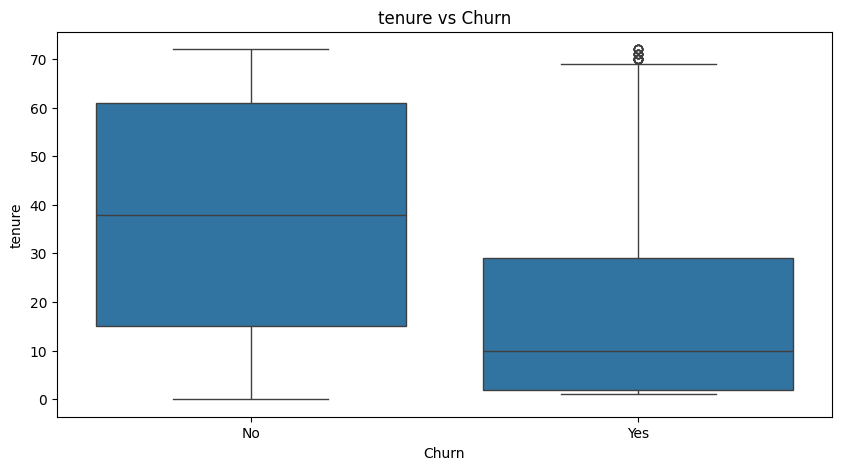

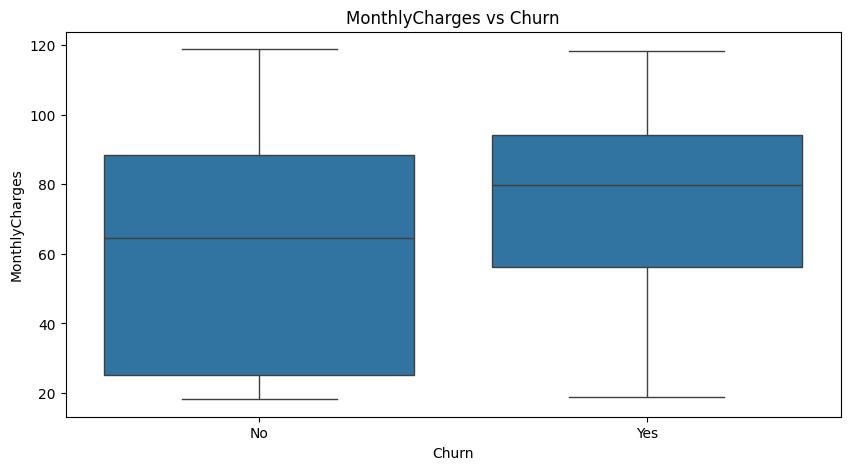

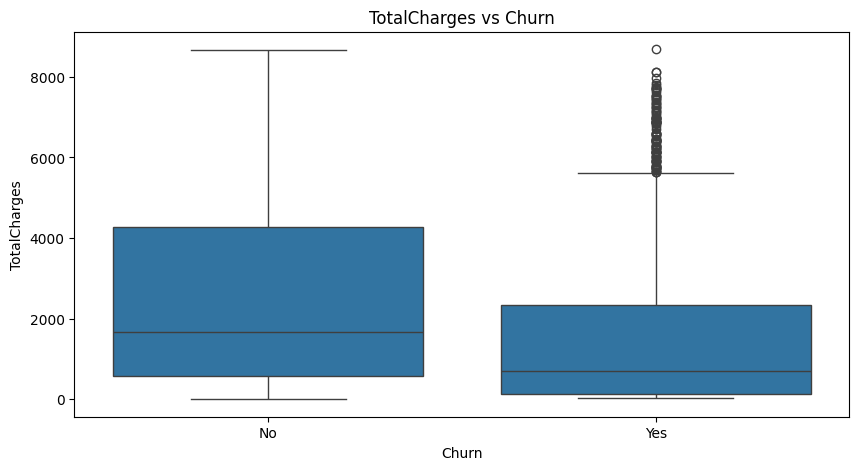

In [77]:
# Numerical columns wrt Churn
def plot_numerical_churn(df, numerical_cols, target_col='Churn'):
    for col in numerical_cols:
        plt.figure(figsize=(10, 5))
        sns.boxplot(data=df, x=target_col, y=col)
        plt.title(f'{col} vs {target_col}')
        plt.xlabel(target_col)
        plt.ylabel(col)
        plt.show()
plot_numerical_churn(df, numerical_cols, target_col='Churn')

### MonthlyCharges vs Churn

- Churned users have a **higher median MonthlyCharges (~$80)** than retained users (~$65)
- Distribution is tighter among churners, concentrated in the $60–$95 range
- Retained users include both high and low MonthlyCharges, suggesting:
  - Low-charge customers likely retain due to low friction
  - Mid-high charge customers churn more — possibly due to perceived cost-value imbalance
- Supports the feature engineering flag: `is_low_charge = MonthlyCharges < 30`

### Tenure vs Churn

- Churned users have a **very low median tenure (~10 months)**, while retained users average ~38 months
- A large portion of churners leave within the **first year**, confirming early-stage dropoff
- Very few churners reach long tenures (50+ months), highlighting strong loyalty among long-time users
- Outliers beyond 70 months exist but are rare
- Confirms usefulness of feature: `is_new_customer = tenure < 6`

### TotalCharges vs Churn

- Churned users have **much lower total charges**, with a compressed distribution centered under ~$1,000
- Retained users span a wider range (up to ~$8,500), reflecting extended billing cycles
- While a few high-paying churners exist, they are outliers
- Confirms: **high spend alone doesn’t prevent churn**, but **low lifetime value is highly predictive of it**
- Suggests that even **customers with sunk cost (moderate TotalCharges)** may still churn if tenure is short

### Behavioral Insight

- Low tenure and TotalCharges are strong churn indicators — they reflect **limited onboarding success**
- Higher MonthlyCharges, despite sunk cost, may still lead to churn if perceived value is low
- Users with higher disposable income may be **more willing to churn**, even after paying significant charges



In [78]:
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

gender: 2 unique values
Partner: 2 unique values
Dependents: 2 unique values
PhoneService: 2 unique values
MultipleLines: 3 unique values
InternetService: 3 unique values
OnlineSecurity: 2 unique values
OnlineBackup: 2 unique values
DeviceProtection: 2 unique values
TechSupport: 2 unique values
StreamingTV: 2 unique values
StreamingMovies: 2 unique values
Contract: 3 unique values
PaperlessBilling: 2 unique values
PaymentMethod: 4 unique values
Churn: 2 unique values
SeniorCitizen: 2 unique values


In [79]:
# Make categorical_cols without 'Churn' column
categorical_cols_no_churn = [col for col in categorical_cols if col != 'Churn']

In [80]:
# Encoding, making it ready to model
from sklearn.preprocessing import StandardScaler

# Step 1: Split off target
df1 = df.drop(columns='Churn')       # Features only
target = df['Churn'].copy()          # Preserve target separately

# Step 2: Scale numerical features
scaler = StandardScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df1[numerical_cols]),
    columns=numerical_cols
)

# Step 3: One-hot encode categorical features
df_encoded = pd.get_dummies(df1[categorical_cols_no_churn], drop_first=True).astype(int)

# Step 4: Combine all processed features with unchanged target
df_final = pd.concat([df_scaled, df_encoded, target], axis=1)

# Step 5: Save
df_final.to_csv("preprocessed_churn_data.csv", index=False)


In [81]:
df2 = pd.read_csv("preprocessed_churn_data.csv")
df2.head(2)

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,-1.277445,-1.160323,-0.992611,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,No
1,0.066327,-0.259629,-0.172165,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,No


In [82]:
from sklearn.model_selection import train_test_split

df = pd.read_csv("preprocessed_churn_data.csv")
X = df.drop(columns='Churn')
y = df['Churn'].map({'No': 0, 'Yes': 1})  # Binary target

In [83]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold

model = LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear')

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')

print("CV ROC-AUC scores:", scores)
print("Mean CV AUC:", scores.mean())


CV ROC-AUC scores: [0.84688495 0.82536191 0.84164203 0.86244608 0.852952  ]
Mean CV AUC: 0.8458573931204867


In [85]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


Test ROC-AUC: 0.8420057351003642
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



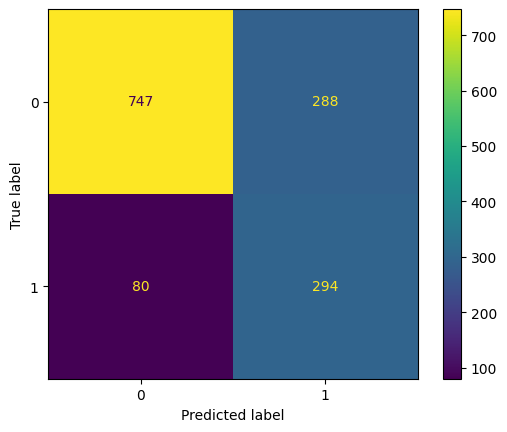

In [86]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

print("Test ROC-AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()


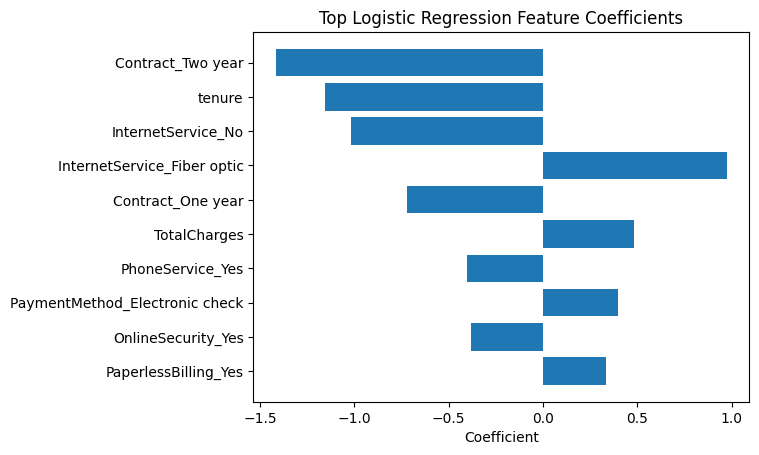

In [87]:
import matplotlib.pyplot as plt
import numpy as np

coef = model.coef_[0]
features = X.columns
top_idx = np.argsort(np.abs(coef))[::-1][:10]

plt.barh(features[top_idx], coef[top_idx])
plt.xlabel("Coefficient")
plt.title("Top Logistic Regression Feature Coefficients")
plt.gca().invert_yaxis()
plt.show()


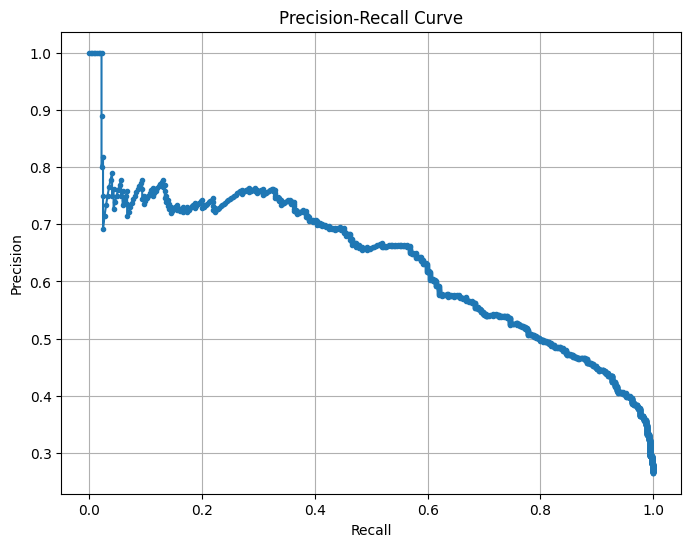

In [88]:
# Plotting Precision-Recall Curve

from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
# Plotting the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.show()

In [89]:
from sklearn.metrics import precision_recall_curve, f1_score

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Compute F1 scores
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)  # Avoid div/0
best_idx = f1_scores.argmax()
best_thresh = thresholds[best_idx]

print(f"Best F1 score: {f1_scores[best_idx]:.4f} at threshold: {best_thresh:.4f}")


Best F1 score: 0.6246 at threshold: 0.5661


In [90]:
y_pred_custom = (y_prob >= best_thresh).astype(int)


In [91]:
print(classification_report(y_test, y_pred_custom))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1035
           1       0.54      0.74      0.62       374

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.76      0.77      1409



In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'class_weight': ['balanced']
}

grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best AUC:", grid.best_score_)
print("Best Params:", grid.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best AUC: 0.8456328461778959
Best Params: {'C': 100, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}


Test ROC-AUC: 0.8404066237825828
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.50      0.78      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



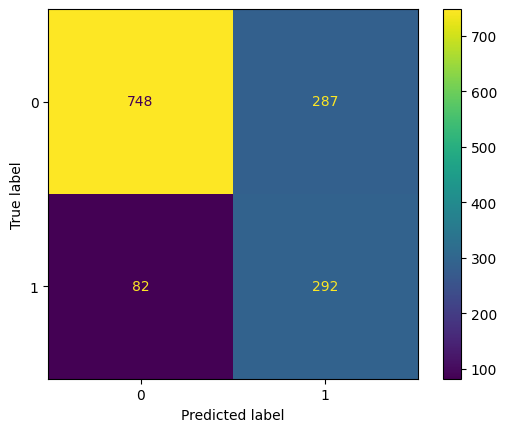

In [93]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
print("Test ROC-AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()


In [94]:
np.unique(y_train)


array([0, 1])

In [104]:
from sklearn.metrics import precision_score, recall_score, make_scorer

def weighted_fbeta(y_true, y_pred, beta=2):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    if precision + recall == 0:
        return 0
    return (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall)




In [105]:
fbeta_scorer = make_scorer(weighted_fbeta, beta=4)


In [106]:
# Optimizing the model with fbeta scoring
grid_fbeta = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    scoring=fbeta_scorer,
    cv=5,
    verbose=1,
    n_jobs=-1
)
grid_fbeta.fit(X_train, y_train)
print("Best F-beta score:", grid_fbeta.best_score_)
print("Best Params for F-beta:", grid_fbeta.best_params_)

# Evaluate the best model
best_model_fbeta = grid_fbeta.best_estimator_
y_pred_fbeta = best_model_fbeta.predict(X_test)
y_prob_fbeta = best_model_fbeta.predict_proba(X_test)[:, 1]
print("Test ROC-AUC with F-beta:", roc_auc_score(y_test, y_prob_fbeta))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best F-beta score: 0.7795426793747028
Best Params for F-beta: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Test ROC-AUC with F-beta: 0.8420909865922653


## 🎯 Custom Metric: Business-Weighted Fβ Score

In churn prediction, not all errors are equal.

- **False Negative (FN)** → A churner is missed, resulting in lost revenue
- **False Positive (FP)** → A loyal customer is wrongly targeted, wasting retention resources

To reflect this, we use a **weighted Fβ score**, which allows us to prioritize **recall** (catching churners) more than precision:

### Fβ Score Formula:

\[
F_{\beta} = (1 + \beta^2) \cdot \frac{P \cdot R}{\beta^2 \cdot P + R}
\]

Where:
- `P` = Precision
- `R` = Recall
- `β` (beta) adjusts the weight:  
  - β = 1 → Standard F1 (precision = recall)  
  - β > 1 → Recall is more important  
  - β < 1 → Precision is more important

---

### Business-Aware β Calculation

We simulate a realistic cost scenario:

- `C_fn` = Revenue lost per churned customer ≈ **$65**  
- `C_fp` = Cost of outreach or offer ≈ **$5**  
- Then:

\[
\beta = \sqrt{\frac{C_{fn}}{C_{fp}}} \approx \sqrt{\frac{65}{5}} \approx 3.6
\]

We rounded this to **β = 4**, which biases the metric toward catching churners while allowing for some false positives.

---

### Final Results (β = 4)

- **Best Fβ Score**: 0.78 (on validation folds)
- **Best Logistic Params**: `C=1`, `penalty='l1'`, `class_weight='balanced'`
- **Test ROC-AUC**: 0.84  
- **Churn Recall**: ~0.78  
- **Churn Precision**: ~0.50–0.54

This custom metric ensures the model aligns with retention strategy and cost realities, not just abstract accuracy.
